# Importing libraries

In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('IRIS_clustering_data.csv')
x,y = data.drop(columns='species'), data['species']
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Trainig model for inertia plot

In [3]:
import warnings
warnings.filterwarnings('ignore')
cluster=[]
for i in range(1,16):
    model = KMeans(n_clusters=i)
    model.fit(x)
    inertia = model.inertia_
    cluster.append(inertia)

# Inertia plot to find n_cluster

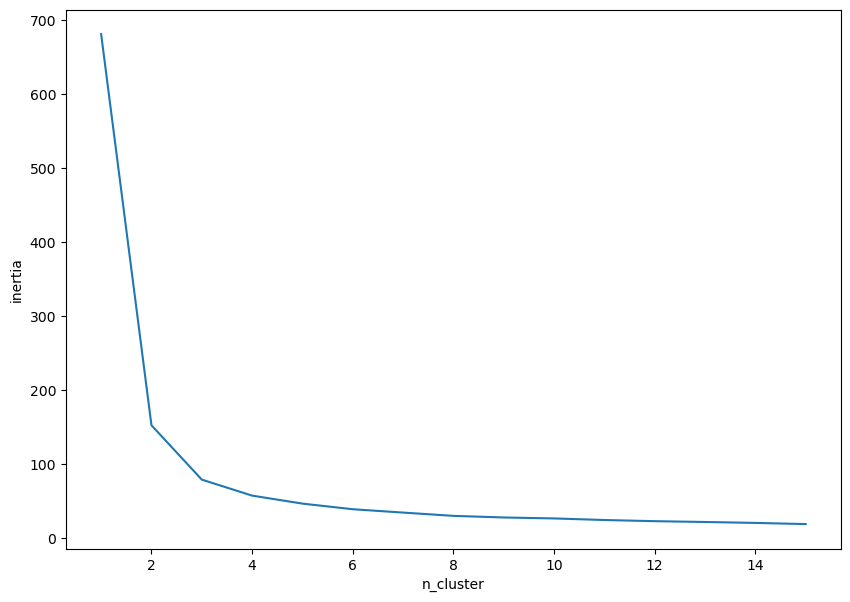

In [4]:
plt.figure(figsize=(10,7))
plt.plot(range(1,16),cluster)
plt.xlabel('n_cluster')
plt.ylabel('inertia')
plt.show()

In [14]:
# silhouette_score_list=[]
# for k in range(2,16):
#     model=KMeans(n_clusters=k)
#     model.fit(x)
#     silhouette_score_list.append(silhouette_score(x,model.labels_))
# plt.figure(figsize=(10,7))
# plt.plot(range(2,16),silhouette_score_list)
# plt.xlabel('n_cluster')
# plt.ylabel('silhouette_score')
# plt.show()

# splitting the data and training the Kmeans model

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)
final_model = KMeans(n_clusters = 3,random_state=123)
final_model.fit(x_train)

KMeans(n_clusters=3, random_state=123)

In [60]:
predict_answer =final_model.predict(x_test)

In [61]:
result=pd.DataFrame({'y_test':y_test,'prediction':predict_answer})
label_dict = {1:'Iris-setosa',0:'Iris-virginica',2:'Iris-versicolor'}
result['prediction'] = result['prediction'].map(label_dict)

In [62]:
# finding the score

In [63]:
result['y_test'].value_counts()

Iris-setosa        13
Iris-virginica     11
Iris-versicolor     6
Name: y_test, dtype: int64

In [64]:
result['prediction'].value_counts()

Iris-setosa        13
Iris-versicolor    10
Iris-virginica      7
Name: prediction, dtype: int64

In [65]:
TP = result['prediction'][result['y_test']==result['prediction']].count()

# score

In [67]:
score = TP/len(result['y_test'])
print(score)

0.8666666666666667


<!--  -->

<!--  -->